<a href="https://colab.research.google.com/github/apotnis07/Iris-Dataset/blob/main/Iris_Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
!which python

/usr/local/bin/python


In [235]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [237]:
sns.set()

In [238]:
data = datasets.load_iris()

In [239]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [240]:
 print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [241]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [242]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [243]:
df['target'] = data['target']

In [244]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [245]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


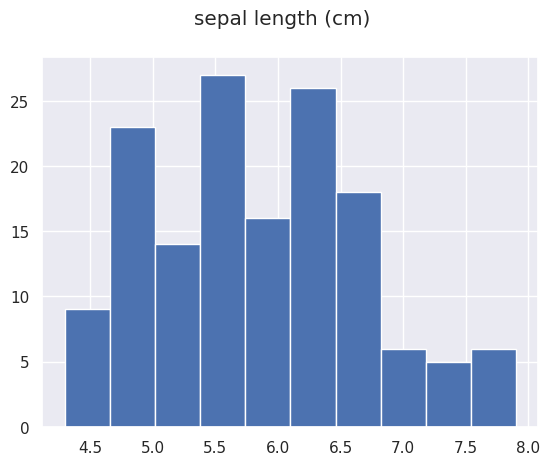

In [246]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

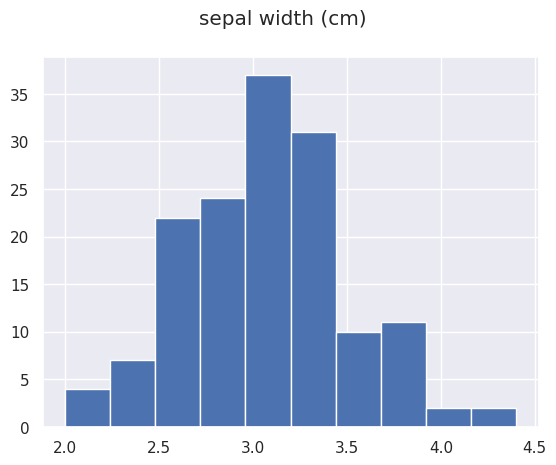

In [247]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

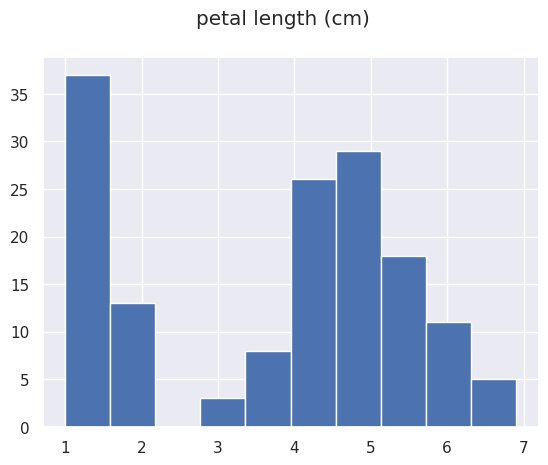

In [248]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

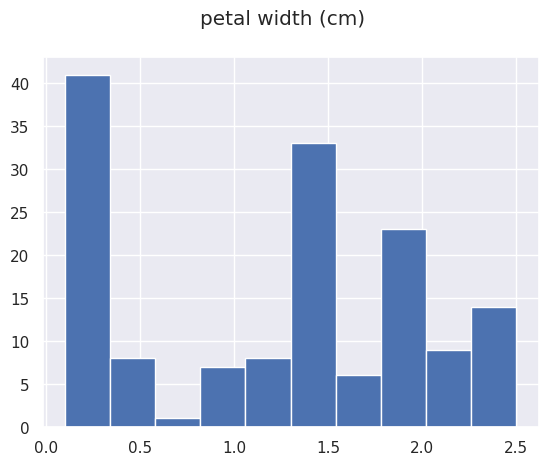

In [249]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

In [250]:
df['target_name'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

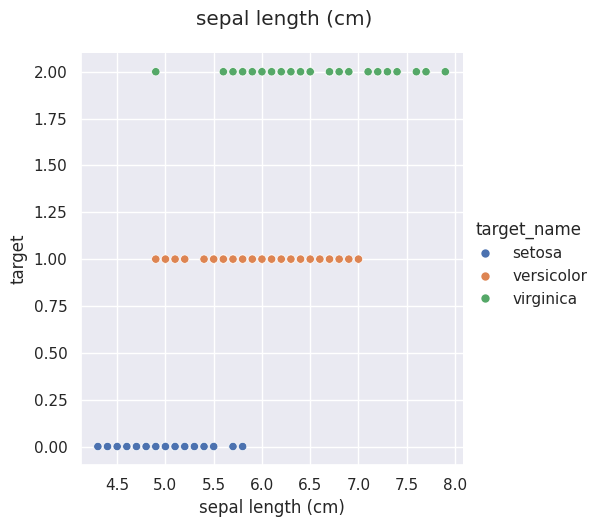

In [251]:
col = "sepal length (cm)"
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

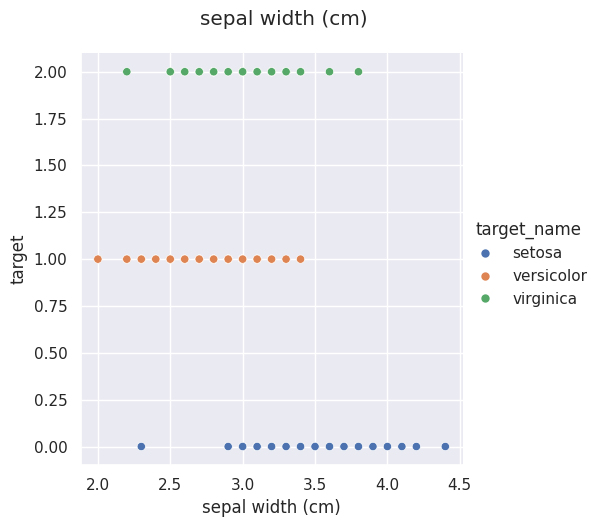

In [252]:
col = "sepal width (cm)"
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

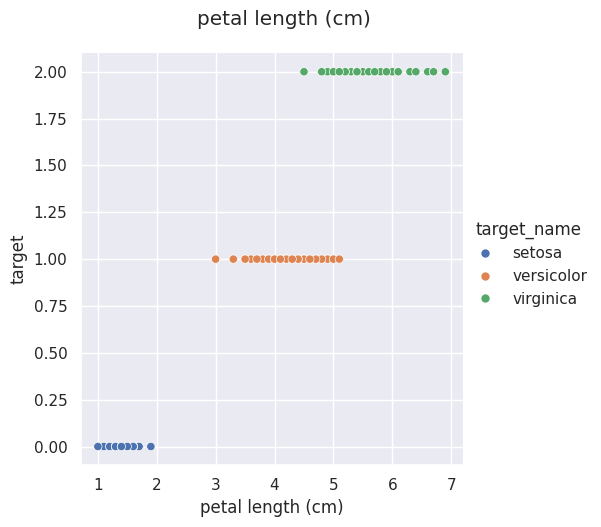

In [253]:
col = "petal length (cm)"
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

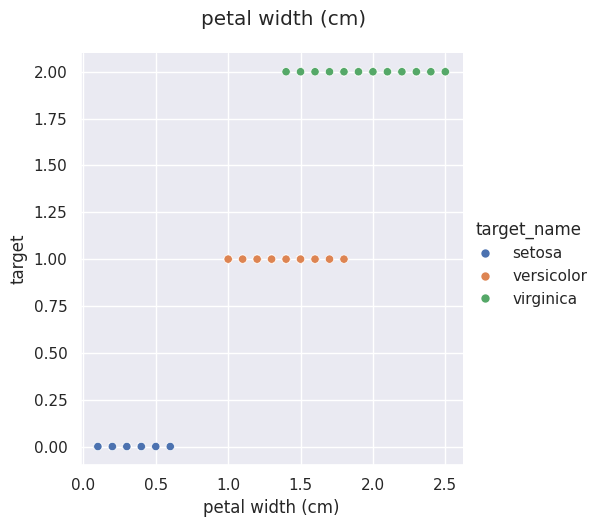

In [254]:
col = "petal width (cm)"
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

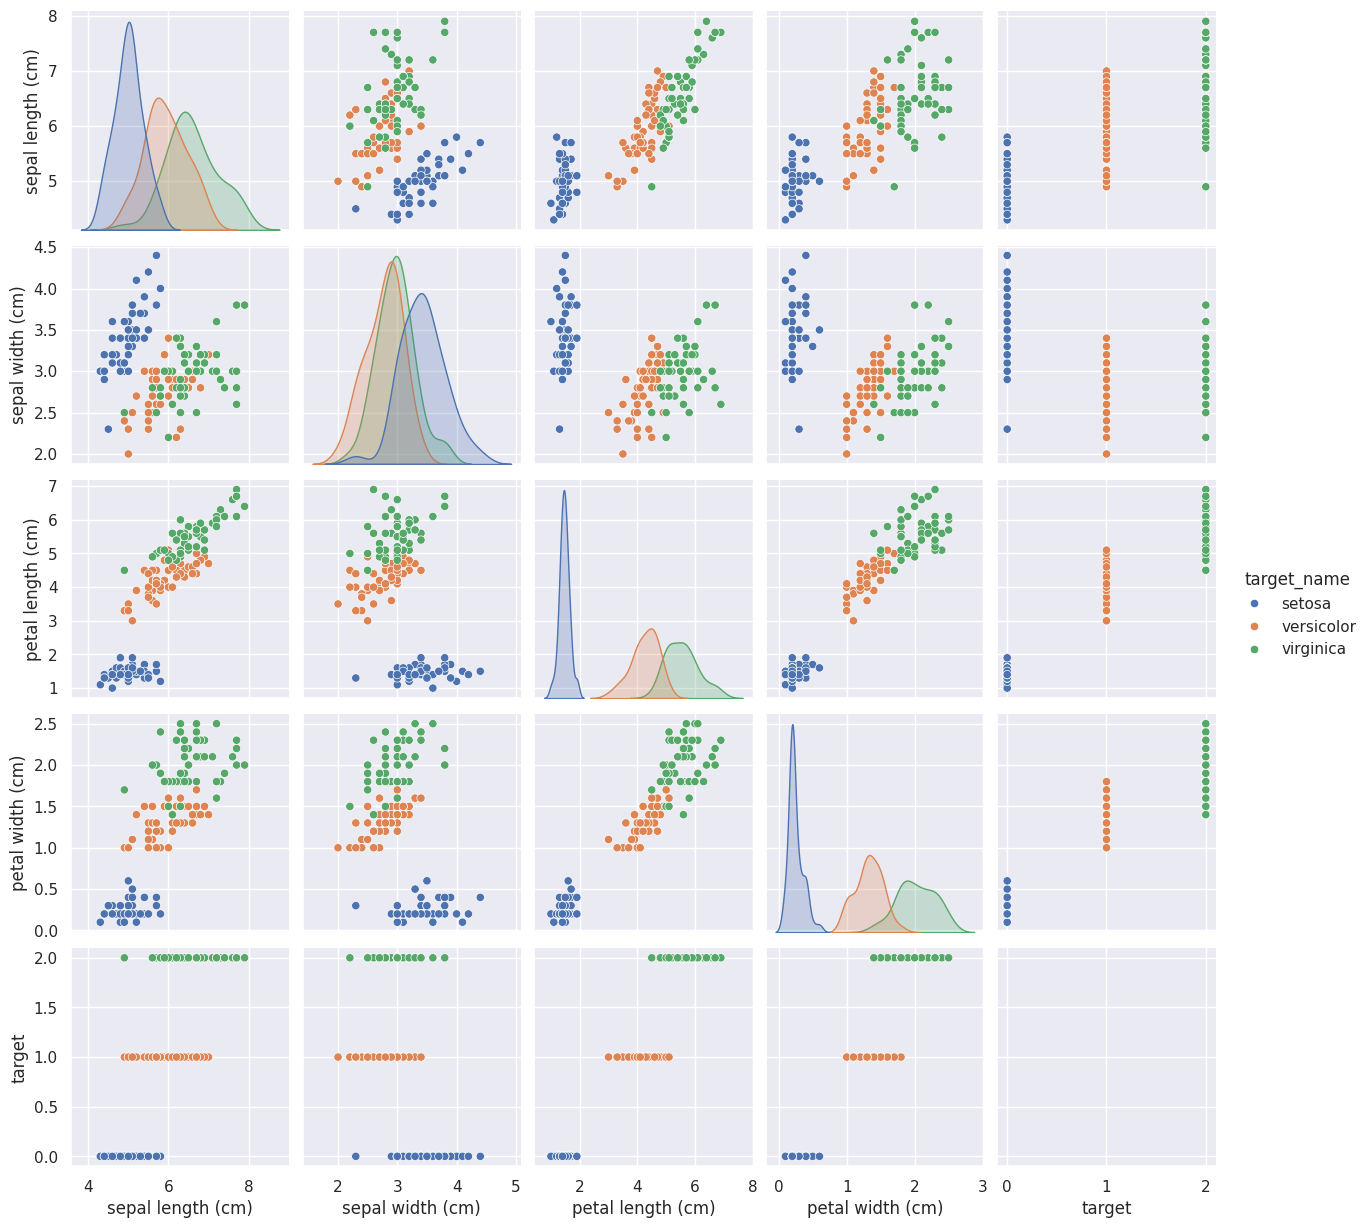

In [255]:
_ = sns.pairplot(df, hue='target_name')

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [258]:
df_train.shape

(112, 6)

In [259]:
df_test.shape

(38, 6)

In [260]:
X_train = df_train.drop(columns=['target','target_name']).values
y_train = df_train['target'].values

In [261]:
y_train

array([0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2,
       0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2,
       2, 1])

In [262]:
def single_feature_prediction(petal_length):
  """Predicts the Iris species given the petal length"""
  if petal_length < 2.5:
    return 0
  elif petal_length < 4.8:
    return 1
  else:
    return 2

In [263]:
X_train[:, 2]

array([1.5, 5.8, 6.1, 3.7, 5.1, 4.6, 4.9, 4.8, 5.6, 6. , 4.1, 5.7, 1.2,
       1.4, 4.7, 1.4, 5.6, 1.4, 1.4, 4.4, 1.5, 4.6, 1.5, 4.2, 3.9, 6. ,
       5.8, 4.8, 1.1, 4.2, 4.6, 6.9, 4.3, 3.5, 1.6, 1.4, 4.5, 5.1, 4.1,
       5.6, 4.1, 1.5, 1.9, 5.2, 5.1, 1.5, 6.1, 1.3, 4.8, 5.5, 5.1, 1.4,
       5.4, 4. , 5.7, 6.1, 3.8, 1.6, 4. , 5.6, 1.6, 1.4, 4.8, 4.5, 5.6,
       1.3, 4.5, 4.7, 4.4, 1.5, 1.5, 4. , 1.5, 4.4, 4.9, 4. , 5.1, 4.9,
       5.9, 4.5, 1.7, 6.4, 1.6, 3.3, 1.3, 3.9, 5. , 6.6, 1.7, 1.3, 1.9,
       4.3, 1.7, 4.7, 6.3, 1.4, 3.3, 1.4, 4.5, 4.2, 6.7, 1.5, 5.4, 1.2,
       3.5, 1.4, 1.6, 1.3, 1.6, 4.9, 4.9, 4.2])

In [264]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train[:, 2]])

In [265]:
y_train

array([0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2,
       0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2,
       2, 1])

In [266]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [267]:
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

Manual model accuracy: 94.64%


In [268]:
from sklearn.linear_model import LogisticRegression

In [269]:
model = LogisticRegression(max_iter=200)

In [270]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [271]:
model.fit(Xt, yt)

LogisticRegression(max_iter=200)

In [272]:
Xv.shape

(28, 4)

In [273]:
y_pred = model.predict(Xv)

In [274]:
np.mean(y_pred == yv)

0.9642857142857143

In [275]:
model.score(Xv,yv)

0.9642857142857143

In [276]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [277]:
model = LogisticRegression(max_iter=200)

In [280]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [281]:
np.mean(accuracies)

0.9648221343873518

In [285]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [288]:
predicted_correctly_mask = y_pred == y_train

In [294]:
not_predicted_correctly_mask = ~not_predicted_correctly_mask

In [295]:
X_train[not_predicted_correctly_mask]

array([[5.9, 3.2, 4.8, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 2.7, 5.1, 1.6]])

In [296]:
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
39,5.1,3.4,1.5,0.2,0,setosa
108,6.7,2.5,5.8,1.8,2,virginica
135,7.7,3.0,6.1,2.3,2,virginica
81,5.5,2.4,3.7,1.0,1,versicolor
110,6.5,3.2,5.1,2.0,2,virginica
...,...,...,...,...,...,...
38,4.4,3.0,1.3,0.2,0,setosa
26,5.0,3.4,1.6,0.4,0,setosa
123,6.3,2.7,4.9,1.8,2,virginica
127,6.1,3.0,4.9,1.8,2,virginica


In [297]:
df_predictions = df_train.copy()

In [298]:
df_predictions['correct_prediction'] = predicted_correctly_mask

In [299]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction
39,5.1,3.4,1.5,0.2,0,setosa,True
108,6.7,2.5,5.8,1.8,2,virginica,True
135,7.7,3.0,6.1,2.3,2,virginica,True
81,5.5,2.4,3.7,1.0,1,versicolor,True
110,6.5,3.2,5.1,2.0,2,virginica,True


In [301]:
df_predictions['prediction'] = y_pred

In [303]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [305]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
39,5.1,3.4,1.5,0.2,0,setosa,True,0,setosa
108,6.7,2.5,5.8,1.8,2,virginica,True,2,virginica
135,7.7,3.0,6.1,2.3,2,virginica,True,2,virginica
81,5.5,2.4,3.7,1.0,1,versicolor,True,1,versicolor
110,6.5,3.2,5.1,2.0,2,virginica,True,2,virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

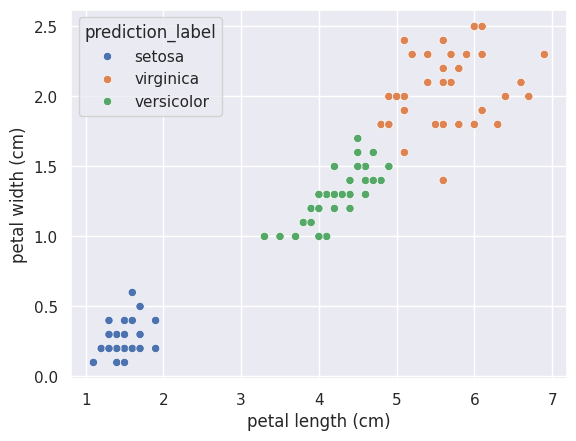

In [307]:
sns.scatterplot(x='petal length (cm)', y="petal width (cm)", data=df_predictions, hue='prediction_label')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

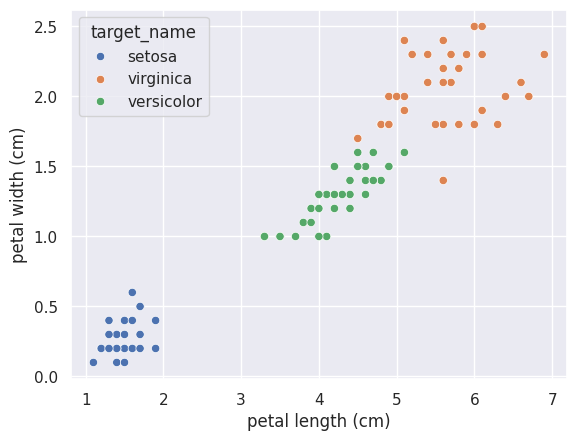

In [309]:
sns.scatterplot(x='petal length (cm)', y="petal width (cm)", data=df_predictions, hue='target_name')

In [322]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
  fig, axs = plt.subplots(2,2, figsize=(10,10))
  axs = axs.flatten()
  sns.scatterplot(x=x_axis_feature,y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
  sns.scatterplot(x=x_axis_feature,y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
  sns.scatterplot(x=x_axis_feature,y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
  axs[3].set_visible(False)
  plt.show()

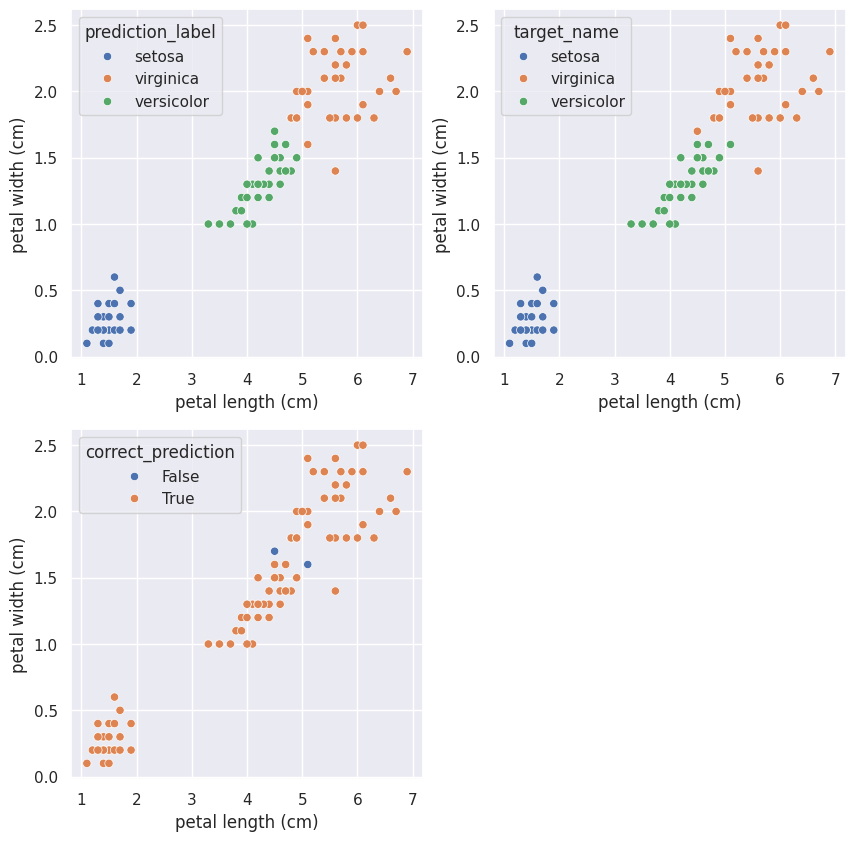

In [323]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

In [346]:
for reg_param in (0.1, 0.3, 2, 5, 5.1, 5.4, 5.8):
  print(reg_param)
  model = LogisticRegression(max_iter=200, C=reg_param)
  accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  print(f"Accuracy: {np.mean(accuracies)*100:.2f}%")

0.1
Accuracy: 93.83%
0.3
Accuracy: 96.48%
2
Accuracy: 96.48%
5
Accuracy: 97.35%
5.1
Accuracy: 97.35%
5.4
Accuracy: 97.35%
5.8
Accuracy: 97.35%


In [347]:
model = LogisticRegression(max_iter=200, C=5)

In [348]:
X_test = df_test.drop(columns=['target_name','target']).values
y_test = df_test['target'].values

In [349]:
X_test.shape

(38, 4)

In [350]:
y_test

array([0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0])

In [351]:
model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=200)

In [352]:
y_test_pred = model.predict(X_test)

In [353]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [354]:
print(f"Test set accuracy: {test_set_accuracy*100:.2f}")

Test set accuracy: 97.37


In [360]:
predicted_correctly_mask_test = y_test_pred == y_test
predicted_correctly_mask_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [409]:
df_predictions_test = df_test.copy()

In [410]:
df_predictions_test['correct_prediction'] = predicted_correctly_mask_test

In [411]:
df_predictions_test['prediction'] = y_test_pred

In [412]:
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [413]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
1,4.9,3.0,1.4,0.2,0,setosa,True,0,setosa
149,5.9,3.0,5.1,1.8,2,virginica,True,2,virginica
111,6.4,2.7,5.3,1.9,2,virginica,True,2,virginica
22,4.6,3.6,1.0,0.2,0,setosa,True,0,setosa
129,7.2,3.0,5.8,1.6,2,virginica,True,2,virginica


In [414]:
def plot_incorrect_predictions_test(df_predictions_test, X_axis_test_feature, y_axis_test_feature):
  fig, axs = plt.subplots(2,2, figsize=(10,10))
  axs = axs.flatten()
  sns.scatterplot(x=X_axis_test_feature, y=y_axis_test_feature, hue='prediction_label', data=df_predictions_test, ax=axs[0])
  sns.scatterplot(x=X_axis_test_feature, y=y_axis_test_feature, hue='target_name', data=df_predictions_test, ax=axs[1])
  sns.scatterplot(x=X_axis_test_feature, y=y_axis_test_feature, hue='correct_predictions', data=df_predictions_test, ax=axs[2])
  axs[3].set_visible(False)

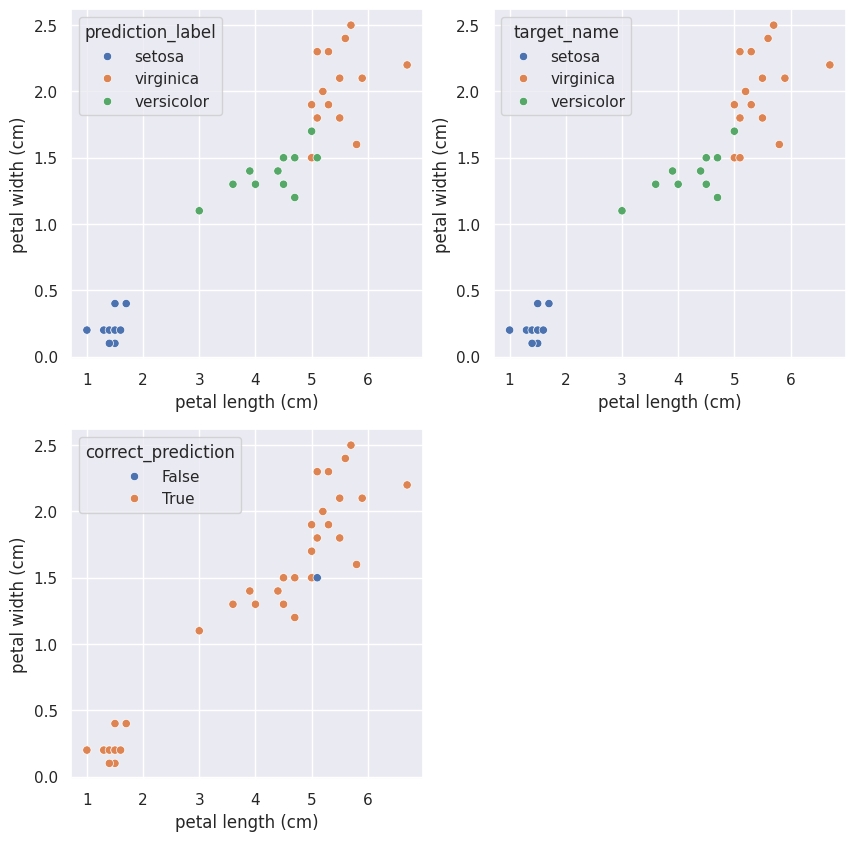

In [415]:
plot_incorrect_predictions(df_predictions_test, "petal length (cm)", "petal width (cm)")